# DISTRIBUTION OF TEXT NOTE ENTRIES AND PATIENT SELECTION

## DESCRIPTION
In this notebook, the graphics A and B inserted in Figure 2 of the paper "MEDomics: Towards Self-Cognizant Hospitals in the Treatment of Cancer" are obtained. Figure 2 is dedicated to the distribution of medical note entries for breast patient population, patient selection and completeness of MEDomics features used for statistical learning.

* A) Distribution of number of days per month with at least 1 medical note from physicians for breast cancer patients, for a time period of 6 months prior to initial diagnosis until 24 months past diagnosis.

* B) Patient selection using the distribution of the breast patient total number of days with medical notes for the same time period as a function of the computed temporal continuity score of medical note entries. Blue - represents patients labeled as institutional patients in the cancer registry; Red - indicate patients who did not receive full treatment at the institution and are rejected from further analysis.


## STATEMENT
 This file is part of <https://github.com/medomics>, a package providing 
 research utility tools for developing precision medicine applications.
 
 --> Copyright (C) 2020  MEDomics consortium

     This package is free software: you can redistribute it and/or modify
     it under the terms of the GNU General Public License as published by
     the Free Software Foundation, either version 3 of the License, or
     (at your option) any later version.

     This package is distributed in the hope that it will be useful,
     but WITHOUT ANY WARRANTY; without even the implied warranty of
     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
     GNU General Public License for more details.
 
     You should have received a copy of the GNU General Public License
     along with this package.  If not, see <http://www.gnu.org/licenses/>.

## IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
import warnings
warnings.filterwarnings("ignore")

## PLOT RESULTS

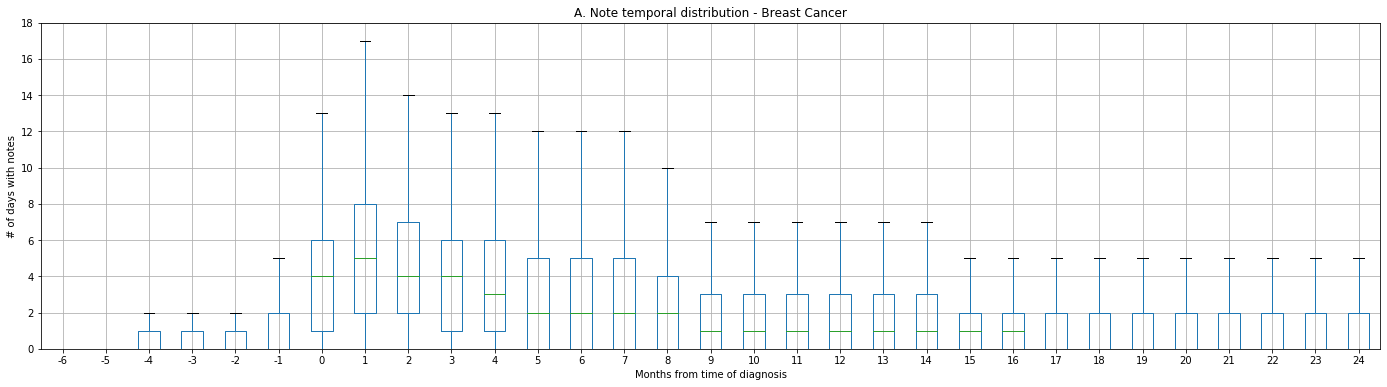

In [2]:
# A) Distribution of number of days per month with at least 1 medical note
# from physicians for breast cancer patients, for a time period of 6 months
# prior to initial diagnosis until 24 months past diagnosis.

def lb_up(lb=0,up=24):
    # This function return the real columns indexs.
    lb_idx = abs(-25-lb)
    ub_idx = abs(-25-lb)+(up+1-lb)
    distance = abs(ub_idx-lb_idx)
    return [lb_idx,ub_idx,distance]

lb = -6
up = 24
df = pd.read_pickle("./Data/Breast_note_entries.pkl")
df.T.plot.box(figsize=(24,6),ylim=[0,18], xlim=[lb_up(lb,up)[0]+0.5,lb_up(lb,up)[1]+0.5],showfliers=False)
plt.grid(True)
plt.xlabel('Months from time of diagnosis')
plt.ylabel('# of days with notes')
plt.title('A. Note temporal distribution - Breast Cancer')
#plt.show()
os.makedirs('eps', 0o777, True)
plt.savefig('./eps/Note_temporal_distribution_Breast_Cancer.eps', format='eps')

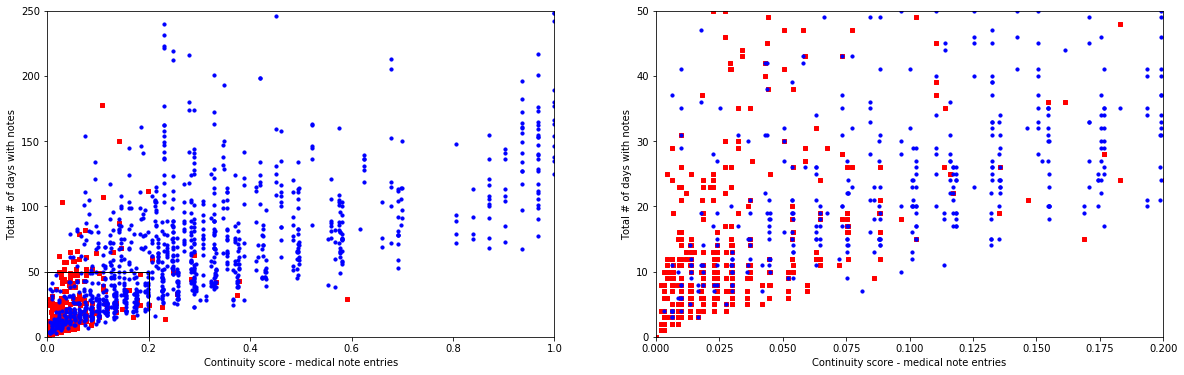

In [3]:
# B) Patient selection using the distribution of the breast patient total number
# of days with medical notes for the same time period, as a function of the computed 
# temporal continuity score of medical note entries. Blue - represents patients
# labeled as institutional patients in the cancer registry; Red - indicate patients 
# who did not receive full treatment at the institution and are rejected from further
# analysis.

df_ELSEWHERE = pd.read_pickle("./Data/Cont_note_entries_ELSEWHERE.pkl")
df_HERE = pd.read_pickle("./Data/Cont_note_entries_HERE.pkl")
rect = patches.Rectangle((0,0),0.2,50,linewidth=1,edgecolor='black',facecolor='none')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(20, 6))
ax1.scatter(df_ELSEWHERE['continuity_alfa'],df_ELSEWHERE['total'], s=10, c='r', marker="s")
ax1.scatter(df_HERE['continuity_alfa'],df_HERE['total'], s=10, c='b', marker="o")
ax1.set_xlim(0,1)
ax1.set_ylim(0,250)
ax1.add_patch(rect)
ax1.set_ylabel('Total # of days with notes')
ax1.set_xlabel('Continuity score - medical note entries')
ax2.scatter(df_ELSEWHERE['continuity_alfa'],df_ELSEWHERE['total'], s=10, c='r', marker="s")
ax2.scatter(df_HERE['continuity_alfa'],df_HERE['total'], s=10, c='b', marker="o")
ax2.set_xlim(0,0.2)
ax2.set_ylim(0,50)
ax2.set_ylabel('Total # of days with notes')
ax2.set_xlabel('Continuity score - medical note entries')
#plt.show()
plt.savefig('./eps/Patient_selection_from_notes.eps', format='eps')